In [185]:
import torch
import torch.utils.data
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [186]:
# Prepare data
my_data = np.genfromtxt('hospital_ready_shuffle.csv', delimiter=',')[1:]
X = my_data[:,:-1]
Y = my_data[:, -1]
Y = Y-1
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train = X[:60000,:]
X_test = X[60000:,:]
Y_train = Y[:60000]
Y_test = Y[60000:]

In [187]:
# data loader
tensor_Xtr = torch.from_numpy(X_train).float()
tensor_Ytr = torch.from_numpy(Y_train).long()
tensor_Xva = torch.from_numpy(X_test).float()
tensor_Yva = torch.from_numpy(Y_test).long()

train = torch.utils.data.TensorDataset(tensor_Xtr, tensor_Ytr)
train_loader = torch.utils.data.DataLoader(train, batch_size=256, shuffle=True)

test = torch.utils.data.TensorDataset(tensor_Xva, tensor_Yva)
test_loader = torch.utils.data.DataLoader(test, batch_size=256, shuffle=True)


In [188]:
# define network
# define nnet
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(73, 200)
        self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(200, 200)
#         self.relu2 = nn.ReLU()
        self.out = nn.Linear(200, 3)
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
#         a2 = self.fc2(h1)
#         h2 = self.relu2(a2)
        a3 = self.out(h1)
        return a3
    
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(73, 200)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(200, 200)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(200, 3)
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        a2 = self.fc2(h1)
        h2 = self.relu2(a2)
        a3 = self.out(h2)
        return a3

In [189]:
# Create model
net = Net()
net.cuda()
opt = optim.SGD(net.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()  

In [190]:
# Test the Model
def test(net, loader):
    correct = 0
    total = 0
    for x, y in loader:
        x = Variable(x).cuda()
        outputs = net(x)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted.cpu() == y).sum()
    return correct.item()/total

In [191]:
# run
best_ac = 0
train_ac = []
test_ac = []
train_loss = []
for epoch in range(20):
    for i, (x, y) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        x = Variable(x).cuda()
        y = Variable(y).cuda()
        
        # Forward + Backward + Optimize
        opt.zero_grad()  # zero the gradient buffer
        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        opt.step()
        
    
    train_loss.append(loss.item())
    tr_ac = test(net, train_loader)
    te_ac = test(net, test_loader)
    train_ac.append(tr_ac)
    test_ac.append(te_ac)
    if te_ac > best_ac:
        torch.save(net.state_dict(), 'model.pb')
        best_ac = te_ac
    print("Epoch: %d, Loss: %4f, Train AC: %4f, Test AC: %.4f, Best AC: %.4f" %  (epoch, loss.item(), tr_ac, te_ac, best_ac))

Epoch: 0, Loss: 1.082309, Train AC: 0.492233, Test AC: 0.4910, Best AC: 0.4910
Epoch: 1, Loss: 1.050058, Train AC: 0.556150, Test AC: 0.5556, Best AC: 0.5556
Epoch: 2, Loss: 1.083405, Train AC: 0.586217, Test AC: 0.5853, Best AC: 0.5853
Epoch: 3, Loss: 1.069627, Train AC: 0.597617, Test AC: 0.5985, Best AC: 0.5985
Epoch: 4, Loss: 1.041814, Train AC: 0.600333, Test AC: 0.6008, Best AC: 0.6008
Epoch: 5, Loss: 1.031907, Train AC: 0.600917, Test AC: 0.6013, Best AC: 0.6013
Epoch: 6, Loss: 1.008809, Train AC: 0.600933, Test AC: 0.6014, Best AC: 0.6014
Epoch: 7, Loss: 1.017278, Train AC: 0.600950, Test AC: 0.6014, Best AC: 0.6014
Epoch: 8, Loss: 0.996557, Train AC: 0.600950, Test AC: 0.6015, Best AC: 0.6015
Epoch: 9, Loss: 0.997062, Train AC: 0.600950, Test AC: 0.6015, Best AC: 0.6015
Epoch: 10, Loss: 1.013910, Train AC: 0.600950, Test AC: 0.6015, Best AC: 0.6015
Epoch: 11, Loss: 1.023153, Train AC: 0.600950, Test AC: 0.6015, Best AC: 0.6015
Epoch: 12, Loss: 0.954566, Train AC: 0.600950, Tes

In [192]:
best_ac

0.6014933148115993

In [193]:
net = Net2()
net.cuda()
opt = optim.SGD(net.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss() 

In [194]:
# run 2
best_ac2 = 0
train_ac2 = []
test_ac2 = []
train_loss2 = []
for epoch in range(20):
    for i, (x, y) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        x = Variable(x).cuda()
        y = Variable(y).cuda()
        
        # Forward + Backward + Optimize
        opt.zero_grad()  # zero the gradient buffer
        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        opt.step()
        
    
    train_loss2.append(loss.item())
    tr_ac = test(net, train_loader)
    te_ac = test(net, test_loader)
    train_ac2.append(tr_ac)
    test_ac2.append(te_ac)
    if te_ac > best_ac2:
        torch.save(net.state_dict(), 'model.pb')
        best_ac2 = te_ac
    print("Epoch: %d, Loss: %4f, Train AC: %4f, Test AC: %.4f, Best AC: %.4f" %  (epoch, loss.item(), tr_ac, te_ac, best_ac2))

Epoch: 0, Loss: 1.110865, Train AC: 0.123050, Test AC: 0.1242, Best AC: 0.1242
Epoch: 1, Loss: 1.105105, Train AC: 0.253567, Test AC: 0.2537, Best AC: 0.2537
Epoch: 2, Loss: 1.100559, Train AC: 0.422183, Test AC: 0.4218, Best AC: 0.4218
Epoch: 3, Loss: 1.087220, Train AC: 0.534500, Test AC: 0.5293, Best AC: 0.5293
Epoch: 4, Loss: 1.081773, Train AC: 0.578867, Test AC: 0.5773, Best AC: 0.5773
Epoch: 5, Loss: 1.069989, Train AC: 0.592350, Test AC: 0.5934, Best AC: 0.5934
Epoch: 6, Loss: 1.066534, Train AC: 0.597950, Test AC: 0.5982, Best AC: 0.5982
Epoch: 7, Loss: 1.060255, Train AC: 0.599900, Test AC: 0.6009, Best AC: 0.6009
Epoch: 8, Loss: 1.060882, Train AC: 0.600717, Test AC: 0.6010, Best AC: 0.6010
Epoch: 9, Loss: 1.063784, Train AC: 0.600917, Test AC: 0.6015, Best AC: 0.6015
Epoch: 10, Loss: 1.052061, Train AC: 0.600917, Test AC: 0.6015, Best AC: 0.6015
Epoch: 11, Loss: 1.046723, Train AC: 0.600950, Test AC: 0.6015, Best AC: 0.6015
Epoch: 12, Loss: 1.049206, Train AC: 0.600950, Tes

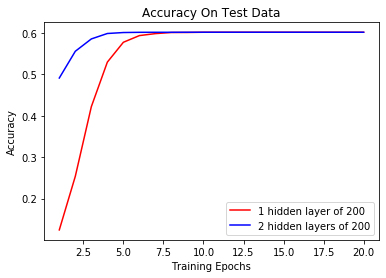

In [195]:
# plot accuracy
plt.plot(np.arange(20)+1, test_ac2, 'r')
plt.plot(np.arange(20)+1, test_ac, 'b')
plt.legend(['1 hidden layer of 200','2 hidden layers of 200'])
plt.title('Accuracy On Test Data')
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.savefig('acc.jpg')

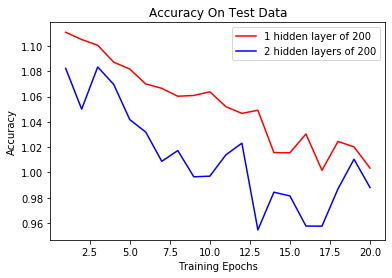

In [196]:
# plot loss
plt.plot(np.arange(20)+1, train_loss2, 'r')
plt.plot(np.arange(20)+1, train_loss, 'b')
plt.legend(['1 hidden layer of 200','2 hidden layers of 200'])
plt.title('Accuracy On Test Data')
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.savefig('loss.jpg')

In [197]:
best_ac

0.6014933148115993

In [198]:
best_ac2

0.6014933148115993